## Singaporean Coconuts

In the nation's first years as the independent Republic of Singapore, coconut production was at an all time high. Soon, however, there was a steep decline in coconut production! I intend to find out why.


In [1]:
import pandas as pd
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = [15, 10] # this makes the plots much bigger and easier to read
pyplot.rcParams['axes.titlesize'] = 16 # this makes title fonts bigger

In [2]:
all_crops = pd.read_csv('all_crops.csv') 
all_crops.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QC,Crops,200,Singapore,5312,Area harvested,486,Bananas,1961,1961,ha,233.0,NaN,Official data,NaN
1,QC,Crops,200,Singapore,5419,Yield,486,Bananas,1961,1961,hg/ha,16567.0,Fc,Calculated data,NaN
2,QC,Crops,200,Singapore,5510,Production,486,Bananas,1961,1961,tonnes,386.0,NaN,Official data,NaN
3,QC,Crops,200,Singapore,5312,Area harvested,486,Bananas,1962,1962,ha,190.0,NaN,Official data,NaN
4,QC,Crops,200,Singapore,5419,Yield,486,Bananas,1962,1962,hg/ha,17368.0,Fc,Calculated data,NaN


In [3]:
def get_unique(label):
    return all_crops[label].unique()

In [4]:
labels = all_crops.columns.values.tolist()
for label in labels:
    if len(get_unique(label)) == 1:
        print(label)

Domain Code
Domain
Area Code
Area
Note


So it looks like _Domain Code, Domain, Area Code, Area, Note_ are some unnecessary columns. I also probably won't be needing _Element Code, Item Code, Flag, Flag Description,_ or _Year Code_.

In [5]:
all_crops_simplified = all_crops.drop(columns=["Domain Code", "Domain", "Area Code", 
                        "Area", "Note", "Element Code", "Item Code", 
                        "Flag", "Flag Description", "Year Code"])
all_crops_simplified.head()

,Element,Item,Year,Unit,Value
0,Area harvested,Bananas,1961,ha,233.0
1,Yield,Bananas,1961,hg/ha,16567.0
2,Production,Bananas,1961,tonnes,386.0
3,Area harvested,Bananas,1962,ha,190.0
4,Yield,Bananas,1962,hg/ha,17368.0


In [6]:
all_crops_yield = all_crops_simplified[all_crops_simplified.Element == 'Yield'].drop(columns=['Element', 'Unit']).set_index('Year').pivot(columns='Item', values='Value').fillna(0)
all_crops_yield.head()

Item,Bananas,"Beans, green",Cabbages and other brassicas,Cassava,Coconuts,Cucumbers and gherkins,"Fruit, fresh nes",Lettuce and chicory,Mushrooms and truffles,"Onions, shallots, green",Roots and tubers nes,Spinach,Sugar cane,Sweet potatoes,"Tobacco, unmanufactured",Tomatoes,"Vegetables, fresh nes"
Year,,,,,,,,,,,,,,,,,
1961,16567.0,100370.0,0.0,125762.0,44612.0,292675.0,71429.0,0.0,0.0,168125.0,75000.0,0.0,0.0,79723.0,14028.0,0.0,139875.0
1962,17368.0,103043.0,0.0,141832.0,43630.0,289702.0,71429.0,0.0,0.0,137857.0,75000.0,0.0,0.0,89661.0,14808.0,0.0,140331.0
1963,16935.0,87419.0,0.0,136028.0,43333.0,237605.0,75862.0,0.0,0.0,123750.0,75000.0,0.0,0.0,88343.0,13358.0,0.0,139339.0
1964,16944.0,95309.0,0.0,135618.0,40441.0,226008.0,75862.0,0.0,0.0,152500.0,75000.0,0.0,0.0,88872.0,22081.0,0.0,139823.0
1965,15250.0,100370.0,0.0,127656.0,40575.0,220190.0,86667.0,0.0,0.0,169167.0,75000.0,0.0,0.0,86609.0,22035.0,0.0,139196.0


In [7]:
all_crops_area = all_crops_simplified[all_crops_simplified.Element == 'Area harvested'].drop(columns=['Element', 'Unit']).set_index('Year').pivot(columns='Item', values='Value').fillna(0)
all_crops_area.head()

Item,Bananas,"Beans, green",Cabbages and other brassicas,Cassava,Coconuts,Cucumbers and gherkins,"Fruit, fresh nes",Lettuce and chicory,Mushrooms and truffles,"Onions, shallots, green",Papayas,Roots and tubers nes,"Rubber, natural",Spinach,Sugar cane,Sweet potatoes,"Tobacco, unmanufactured",Tomatoes,"Vegetables, fresh nes"
Year,,,,,,,,,,,,,,,,,,,
1961,233.0,81.0,0.0,210.0,2914.0,243.0,1400.0,0.0,0.0,32.0,0.0,4.0,0.0,0.0,0.0,506.0,360.0,0.0,1760.0
1962,190.0,69.0,0.0,202.0,2865.0,235.0,1400.0,0.0,0.0,28.0,0.0,4.0,0.0,0.0,0.0,502.0,287.0,0.0,1750.0
1963,186.0,93.0,0.0,214.0,2700.0,263.0,1450.0,0.0,0.0,32.0,0.0,4.0,0.0,0.0,0.0,513.0,265.0,0.0,1800.0
1964,180.0,81.0,0.0,251.0,2720.0,263.0,1450.0,0.0,0.0,24.0,0.0,4.0,0.0,0.0,0.0,523.0,173.0,0.0,1865.0
1965,200.0,81.0,0.0,273.0,2711.0,263.0,1500.0,0.0,0.0,12.0,0.0,4.0,0.0,0.0,0.0,522.0,226.0,0.0,2500.0


In [8]:
all_crops_production = all_crops_simplified[all_crops_simplified.Element == 'Production'].drop(columns=['Element', 'Unit']).set_index('Year').pivot(columns='Item', values='Value').fillna(0)
all_crops_production.head()

Item,Bananas,"Beans, green",Cabbages and other brassicas,Cassava,Coconuts,Cucumbers and gherkins,"Fruit, fresh nes",Lettuce and chicory,Mushrooms and truffles,"Onions, shallots, green",Papayas,Roots and tubers nes,"Rubber, natural",Spinach,Sugar cane,Sweet potatoes,"Tobacco, unmanufactured",Tomatoes,"Vegetables, fresh nes"
Year,,,,,,,,,,,,,,,,,,,
1961,386.0,813.0,0.0,2641.0,13000.0,7112.0,10000.0,264.0,0.0,538.0,0.0,30.0,1602.0,0.0,0.0,4034.0,505.0,0.0,24618.0
1962,330.0,711.0,0.0,2865.0,12500.0,6808.0,10000.0,305.0,0.0,386.0,0.0,30.0,1617.0,0.0,0.0,4501.0,425.0,0.0,24558.0
1963,315.0,813.0,0.0,2911.0,11700.0,6249.0,11000.0,254.0,0.0,396.0,0.0,30.0,1775.0,0.0,0.0,4532.0,354.0,0.0,25081.0
1964,305.0,772.0,0.0,3404.0,11000.0,5944.0,11000.0,203.0,0.0,366.0,0.0,30.0,1524.0,0.0,0.0,4648.0,382.0,0.0,26077.0
1965,305.0,813.0,0.0,3485.0,11000.0,5791.0,13000.0,203.0,0.0,203.0,0.0,30.0,1524.0,0.0,0.0,4521.0,498.0,0.0,34799.0


In [9]:
def big_plot(df, title):
    pyplot.plot(df)
    pyplot.title(title)
    pyplot.legend(loc='best', ncol=2, labels=df.columns.values.tolist(), fontsize='small')

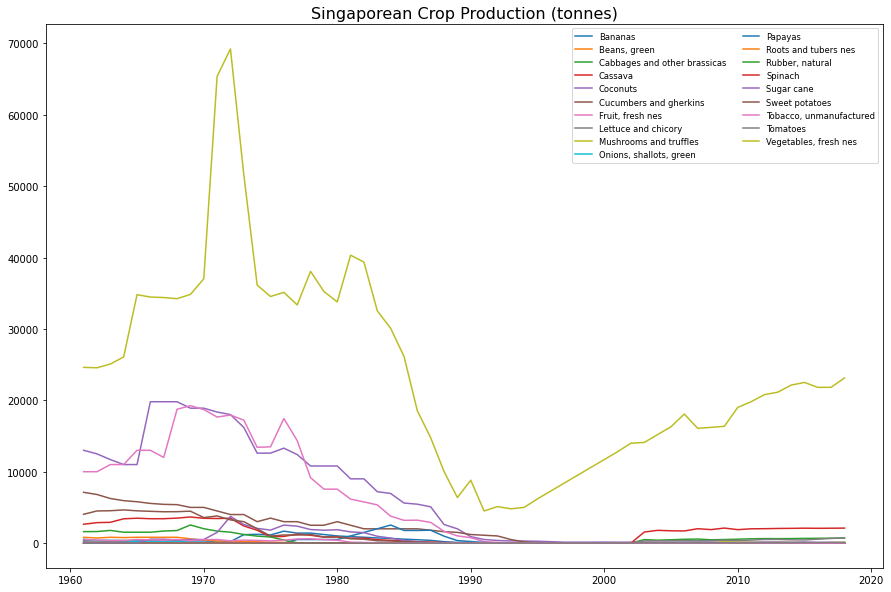

In [10]:
big_plot(all_crops_production, "Singaporean Crop Production (tonnes)")

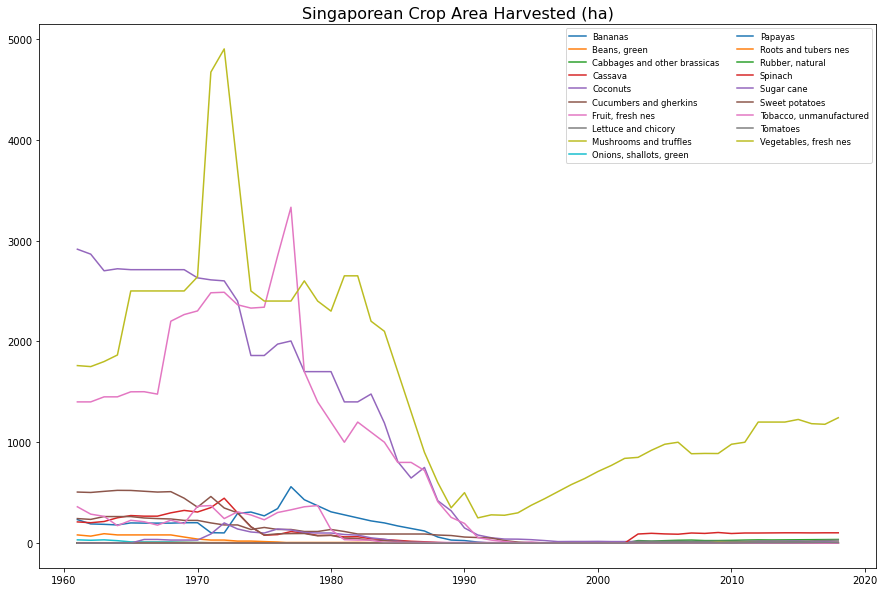

In [11]:
big_plot(all_crops_area, "Singaporean Crop Area Harvested (ha)")

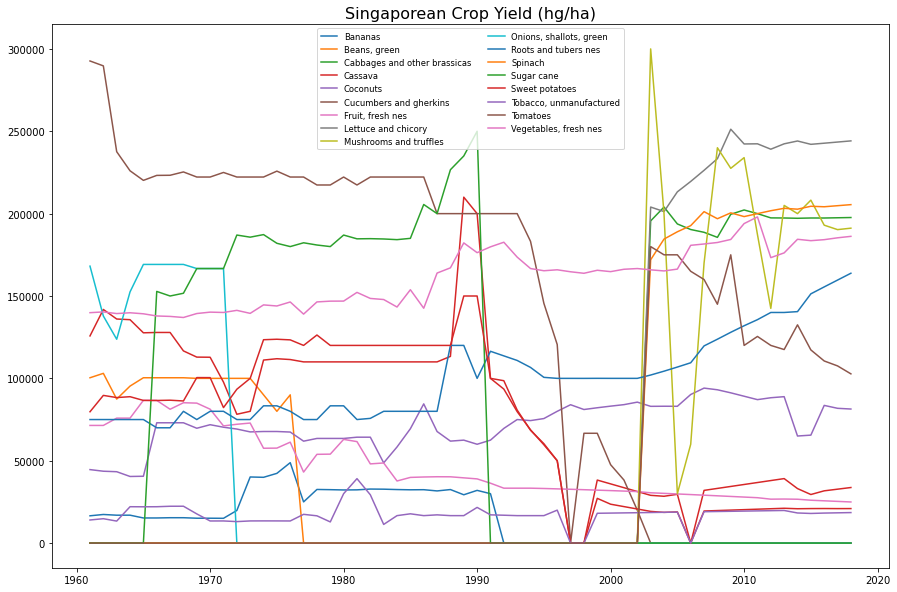

In [12]:
big_plot(all_crops_yield, "Singaporean Crop Yield (hg/ha)")

It looks like production and area harvested have gone down significantly, while yield is a hot mess. It looks like production and area harvested starts going down around the late 70s and early 80s. This is somewhat consistent with [this book from the US government](http://countrystudies.us/singapore/39.htm), which says that agriculture started getting phased out in the late 1980s to be replaced with industry. Let's take a look at the yield of high performing crops and our personal favorite, the humble coconut.

In [13]:
def small_plot(df, columns):
    fig, axs = pyplot.subplots(len(columns))
    for i in range(len(columns)):
        axs[i].plot(df[columns[i]])
        axs[i].set_title(columns[i])
    fig.tight_layout(pad=2.0)
    pyplot.show() 

Crop Yield


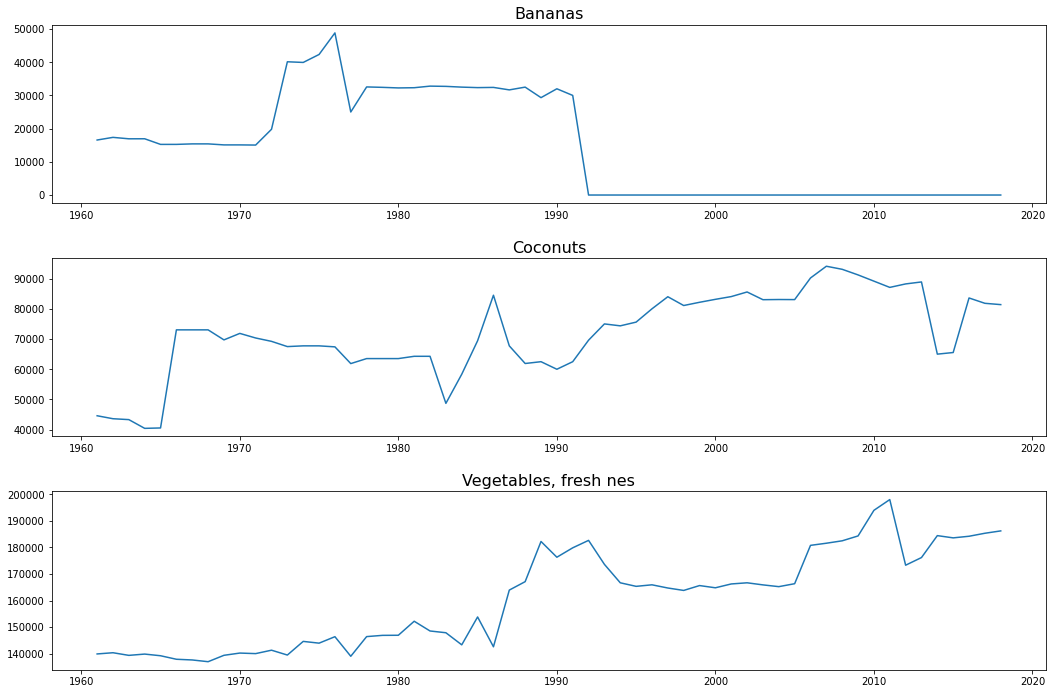

In [14]:
print("Crop Yield")
small_plot(all_crops_yield, ["Bananas", "Coconuts", "Vegetables, fresh nes"])

Crop Production


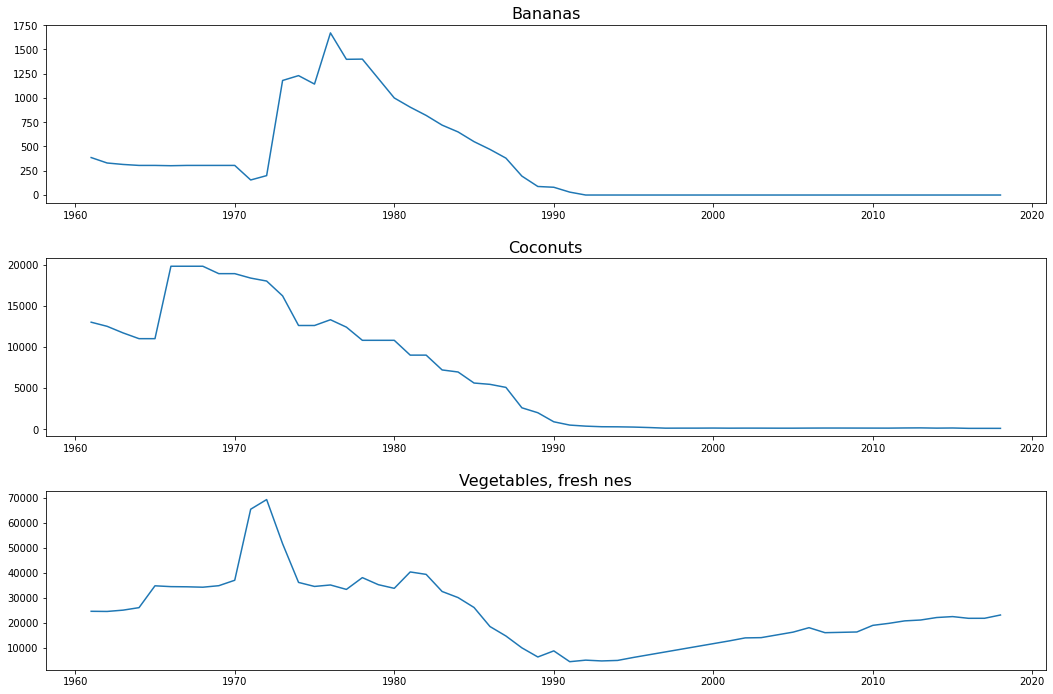

In [15]:
print("Crop Production")
small_plot(all_crops_production, ["Bananas", "Coconuts", "Vegetables, fresh nes"])

It actually looks like despite the overall decrease in coconut production, coconut yield has remained somewhat consistent, if not slightly increasing. So, even though they suck at making a large quantity of coconuts, they do make a good amount of coconuts for the amount of farmland they have.

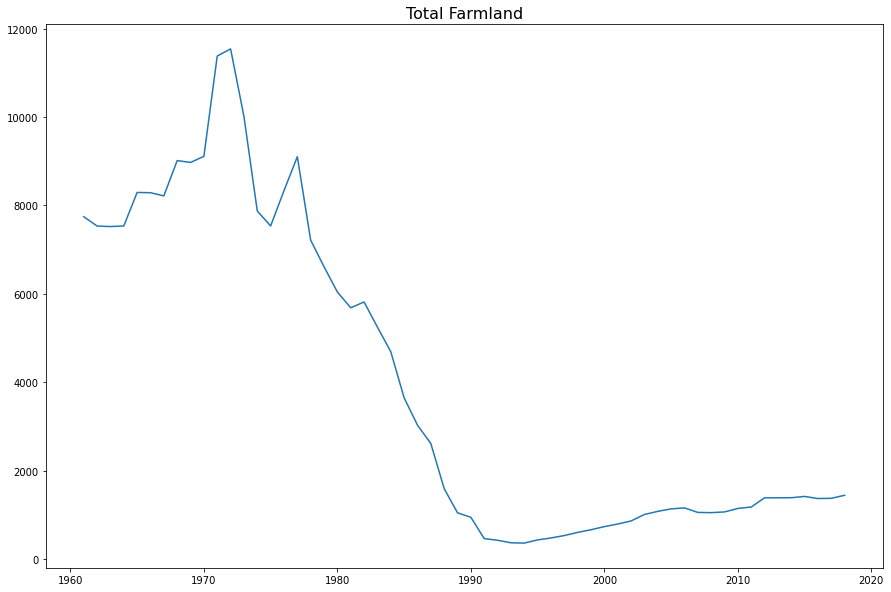

In [16]:
all_crops_area["sum"] = all_crops_area.sum(axis=1) # sum the rows

pyplot.plot(all_crops_area["sum"])
pyplot.title("Total Farmland")
pyplot.show()

It looks like the total farmland shot down starting in the 70s and has slowly picked back up since the late 90s. I wonder if this is because they want to rely less on exports for their food. Let's look at industry statistics from the 90s on to validate our hypothesis that industry is replacing agriculture, including our beloved coconut.

In [17]:
industry_stats = pd.read_csv("industry_stats.csv", index_col=0).replace(to_replace="..", value=0) # i'm replacing some dots that were supposed to indicate missing data with 0
industry_stats.head()

,Industry_dollar,Agriculture_dollar,Industry_GDP,Agriculture_GDP,Employment_agriculture,Employment_industry,High_tech_exports
Time,,,,,,,
1990,1.731294e+10,1.724239e+08,30.841629,0.323371,0,0,39.893886
1991,1.860103e+10,1.581225e+08,32.598199,0.250009,0.282000005245209,35.1679992675781,40.541771
1992,1.953986e+10,1.492483e+08,32.265180,0.197263,0.31700000166893,34.6300010681152,44.796518
1993,2.136326e+10,1.384672e+08,32.119972,0.172672,0.245000004768372,33.8800010681152,47.503107
1994,2.442633e+10,1.419875e+08,31.292362,0.172955,0.296999990940094,32.7430000305176,50.658976


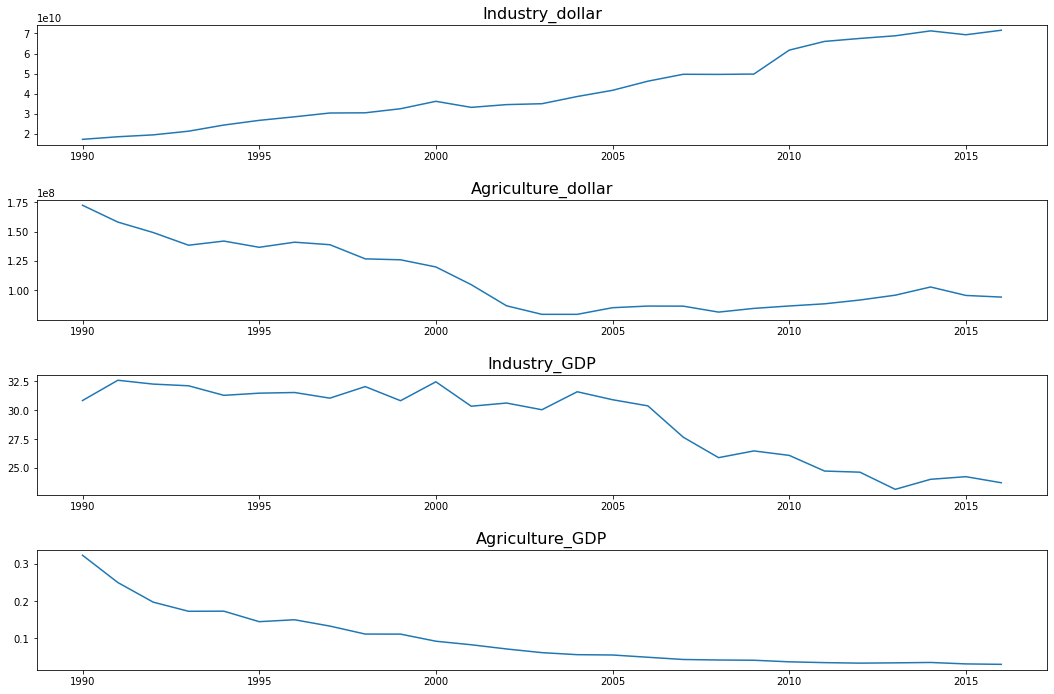

In [18]:
small_plot(industry_stats, industry_stats.columns.values.tolist()[0:4])

It looks like industry did replace agriculture, you can see it trending up while agriculture trends down in terms of dollar value. However, industry as a percentage of GDP also starts going down in the 2000s. This might be due to an increased focus on tourism as a main economic force.

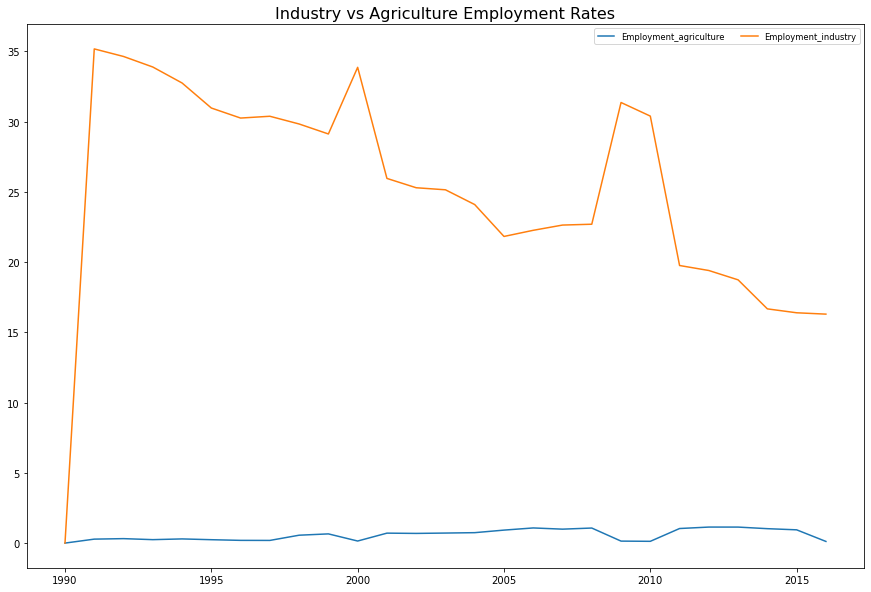

In [19]:
big_plot(industry_stats[["Employment_agriculture", "Employment_industry"]], "Industry vs Agriculture Employment Rates")

Industry has clearly been a leader in employment, at least since the 1990s.

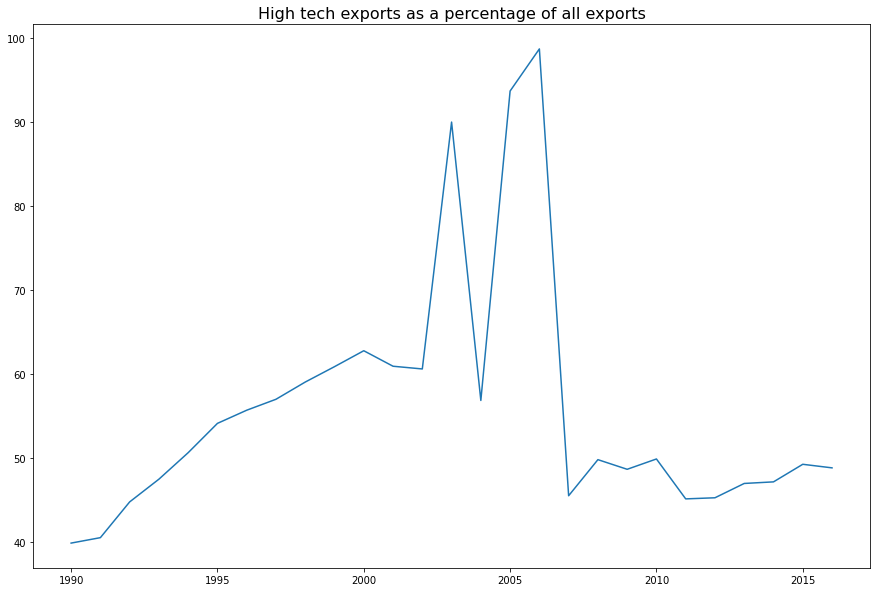

In [20]:
pyplot.plot(industry_stats["High_tech_exports"])
pyplot.title("High tech exports as a percentage of all exports")
pyplot.show()

It looks like high tech has become one of their main exports, at greater than 50 percent roughly since ~1995. It definitely isn't coconuts! (Although, to be fair it probably never has been.) 

# Conclusions:
It looks like the acceleration of the industry and high-tech exports in the early 80s, along with the diminishing of farmland and a push towards tourism killed Singaporean coconut production, which was never really thriving in the first place. 